   Unnamed: 0  Customer_name  Rating  \
0           0  maneshpreet26       5   
1           1   Majnu gosavi       5   
2           2  Akash Bhosale       5   
3           3    Mahek Dugar       5   
4           4         Jaslin       4   

                                        Review_Title  \
0  Unforgettable experience..amazing staycation e...   
1           All about in love with grand Hyatt hotel   
2                         Most Knowledgeable Trainer   
3                 A night stay at Grand Hyatt Mumbai   
4                                         Staycation   

                                              Review  
0  We visited Grand Hyatt on the occasion of my s...  
1  तुम्हारी क्या तारीफ करू  तुम्ह ही तो तारीफ हो ...  
2  I was fascinated by the Diet and Exercise know...  
3  absolutely loved the stay. amazing food, ambie...  
4  I had booked Grand Hyatt Santacruz for Staycat...  
        Unnamed: 0       Rating
count  5000.000000  5000.000000
mean   2499.500000     4.431

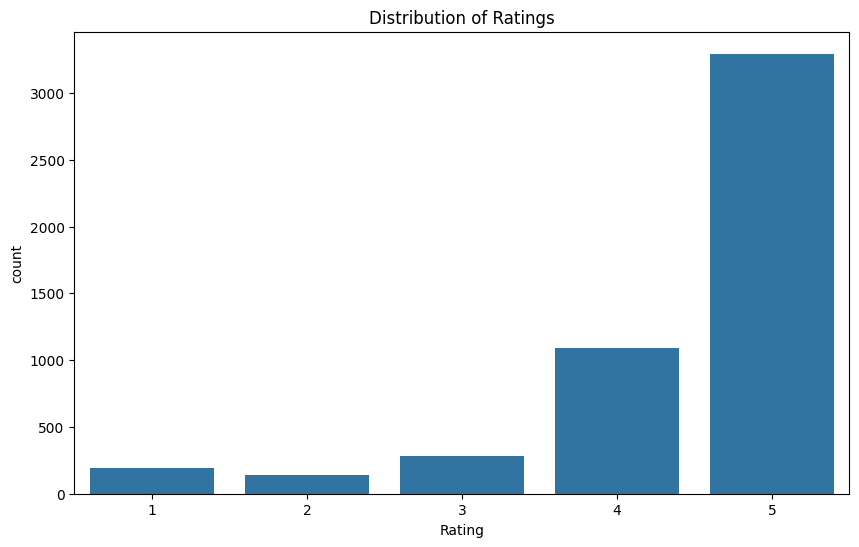

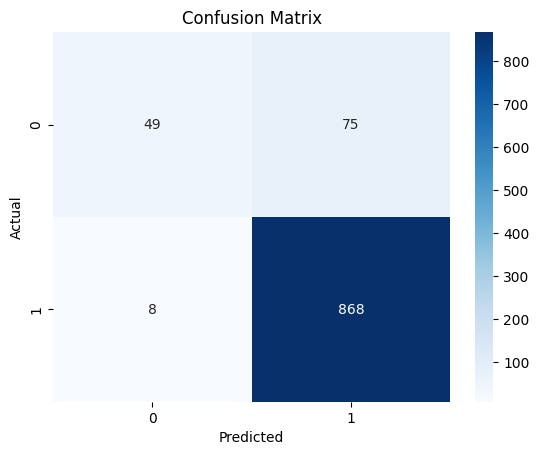

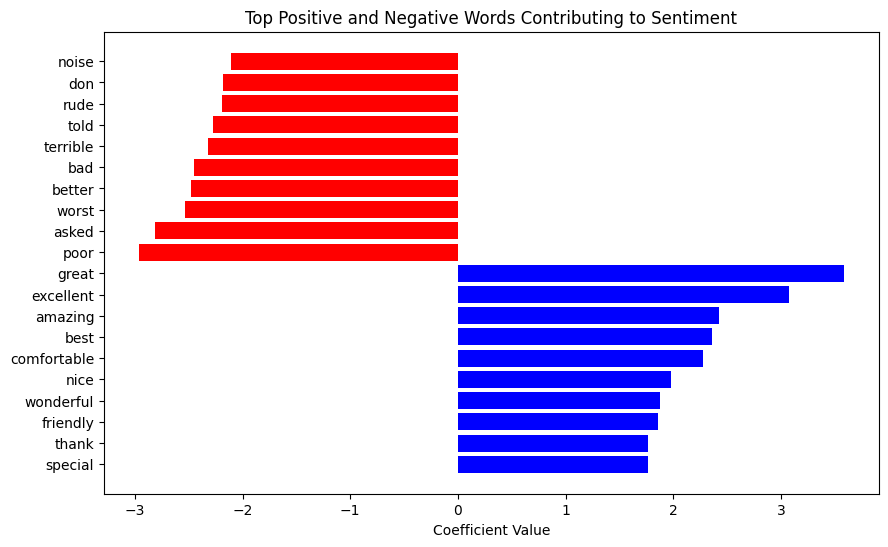

In [ ]:
# Project Overview
# Purpose: Analyze hotel review sentiments to gain insights into customer satisfaction.
# Dataset: Hotel Review Sentimental Analysis.csv
# Key Attributes: Customer_name, Rating, Review_Title, Review

# Libraries and Data Handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv("06_Hotel Reviews Sentimental Analysis.csv")

# Display the first few rows of the data
print(data.head())

# Data Cleaning and Preprocessing
# Handling missing values
data = data.dropna()

# Convert categorical data if necessary (e.g., Rating)
data['Rating'] = data['Rating'].astype(int)

# Feature Extraction using TfidfVectorizer for text data
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(data['Review'])

# Data Analysis Techniques
# Descriptive Statistics
print(data.describe())

# Inferential Statistics
# Assuming we have categorical data for analysis like customer demographics (not present in the provided data structure)

# Predictive Model
# For sentiment analysis, we will use Logistic Regression
X = tfidf_matrix
y = data['Rating'] > 3  # Assuming ratings > 3 are positive sentiments

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visual Insights
# Visualizing the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=data)
plt.title('Distribution of Ratings')
plt.show()

# Visualizing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualizing the top words contributing to sentiment
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]
top_positive_indices = np.argsort(coefs)[-10:]
top_negative_indices = np.argsort(coefs)[:10]

plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[top_positive_indices], coefs[top_positive_indices], color='blue')
plt.barh(np.array(feature_names)[top_negative_indices], coefs[top_negative_indices], color='red')
plt.xlabel('Coefficient Value')
plt.title('Top Positive and Negative Words Contributing to Sentiment')
plt.show()
